In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1)
plt.style.use('seaborn')

N,n_feature = 5000,3
lr = 0.01
epochs = 500
b_size = 32

t_W = np.random.normal(-1,1,(n_feature,1))
t_b = np.random.normal(-1,1,(1,1))

W = np.random.normal(-1,1,(n_feature,1))
b = np.random.normal(-1,1,(1,1))

n_batch = N//b_size
x_data = np.random.normal(0,1,(N,n_feature))
y_data = x_data@t_W+t_b
y_data = (y_data>0).astype(np.int)

J_track = list()
acc_track = list()

for epoch in range(epochs):
    for b_idx in range(n_batch):
        X = x_data[b_idx*b_size:(b_idx+1)*b_size,...]
        Y = y_data[b_idx*b_size:(b_idx+1)*b_size,...]

        z = X@W+b
        pred = 1/(1+np.exp(-z))
        J0 = -(Y*np.log(pred)+(1-Y)*np.log(1-pred))
        J = np.mean(J0)
        J_track.append(J)

        pred_ = (pred>0.5).astype(np.int)
        n_correct = np.sum((pred_==Y).astype(np.int))
        acc = n_correct/b_size
        acc_track.append(acc)

        dJ_dJ0 = 1/N*np.ones((1,b_size))
        dJ0_dpred = np.diag(((pred-Y)/(pred*(1-pred))).flatten())
        dpred_dz = np.diag((pred*(1-pred)).flatten())
        dz_dw = X
        dz_db = np.ones((b_size,1))

        dJ_dpred = dJ_dJ0 @ dJ0_dpred
        dJ_dz = dJ_dpred @ dpred_dz
        dJ_dw = dJ_dz @ dz_dw
        dJ_db = dJ_dz @ dz_db

        W = W- lr*dJ_dw.T
        b = b- lr*dJ_db

In [3]:
#logistic regression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

N,n_feature = 5000,3
lr = 0.01
epochs = 500
b_size=32

t_W = np.random.uniform(-1,1,(n_feature,1))
t_b = np.random.uniform(-1,1,(1,1))

W = np.random.uniform(-1,1,(n_feature,1))
b = np.random.uniform(-1,1,(1,1))

n_batch = N// b_size
x_data = np.random.normal(0,1,(N,n_feature))
y_data = x_data@t_W+t_b
y_data=(y_data>0).astype(np.int)

J_track = list()
acc_track = list() 
for epoch in range(epochs):
    for b_idx in range(n_batch):
        #get minibatch
        X = x_data[b_idx*b_size:(b_idx+1)*b_size,...]
        Y = y_data[b_idx*b_size:(b_idx+1)*b_size,...]

        #forward propagation
        z = X@W +b
        pred = 1/(1+np.exp(-z))
        J0 = -(Y*np.log(pred)+(1-Y)*np.log(1-pred))
        J = np.mean(J0)
        J_track.append(J)

        #calculate accuracy
        pred_ = (pred>0.5).astype(np.int)
        n_correct = np.sum((pred_==Y).astype(np.int))
        acc = n_correct/b_size
        acc_track.append(acc)

        #jacobians
        dJ_dJ0 = 1/N*np.ones((1,b_size))
        dJ0_dpred = np.diag(((pred-Y)/(pred*(1-pred))).flatten())
        dpred_dz = np.diag((pred*(1-pred)).flatten())
        dz_dW = X
        dz_db = np.ones((b_size,1))

        #backpropagation
        dJ_dpred= dJ_dJ0@dJ0_dpred
        dJ_dz= dJ_dpred @ dpred_dz
        dJ_dw = dJ_dz @ dz_dW
        dJ_db = dJ_dz @ dz_db
        
        #parameter update
        W = W -lr*dJ_dw.T
        b = b- lr*dJ_db

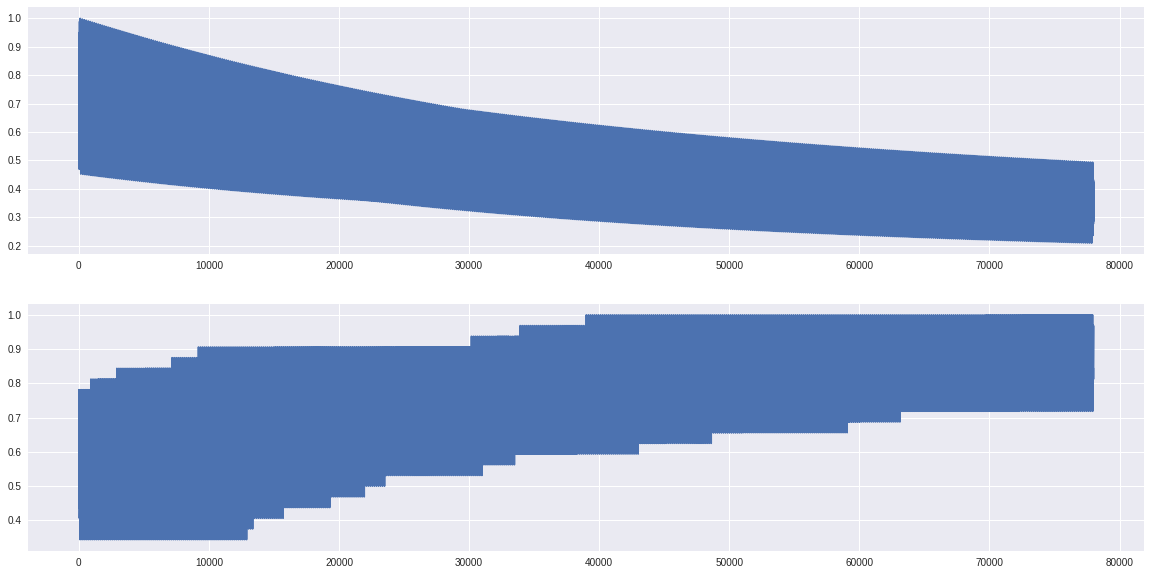

In [2]:
fig,axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(J_track)
axes[1].plot(acc_track)